In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using Theano backend.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29



Using gpu device 0: GeForce GTX 1070 (CNMeM is enabled with initial size: 85.0% of memory, cuDNN 5110)


In [2]:
train_data_dir = './td'

In [3]:
from utils import *
%matplotlib inline

In [45]:
train_datagen = ImageDataGenerator(
    rotation_range= 20,
    shear_range = 0.1,
    zoom_range=[0.8, 1.05],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='constant')  # "constant", "nearest", "reflect" or "wrap"

In [46]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='binary')
idx = 0

Found 4 images belonging to 2 classes.


5
(2, 224, 224, 3)


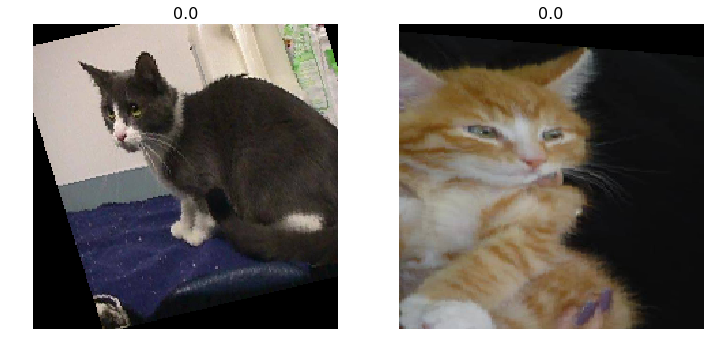

In [52]:
imgs, lbs = next(train_generator)
print(idx)
idx += 1
plots(imgs, titles=lbs)
print(imgs.shape)

In [1]:
import bcolz

In [2]:
def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()


def load_array(fname):
    return bcolz.open(fname)[:]

In [3]:
id0 = load_array('trnLabels.bc')

In [6]:
save_array('/Trn_data_aug0/trn.bc', id0)

FileNotFoundError: [Errno 2] No such file or directory: '/Trn_data_aug0/trn.bc'

In [7]:
import os
os.path.split('./Trn_data_aug0/trnConvFeatures_aug0.bc')

('./Trn_data_aug0', 'trnConvFeatures_aug0.bc')